In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics

In [3]:
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

In [4]:
train_df.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating,Success_probability
0,Title65FB0,Montoya-Gonzalez PLC,Education/Training,325362$,1756954.8$,2020-03-30,Product_2,+1-158-537-2939x2838,500 Million - 1 Billion,Category 2,...,CEO/President,jenniferedwards@montoyagonzalez.com,"Librarian, public",Others,Level 1,?,"Jones,Eyvette W",No,1,58.6
1,Title91761,Weeks-Huffman Ltd,Real Estate,492285$,2904481.5$,2020-11-16,Product_1,629.180.6035x093,500 Million - 1 Billion,Category 1,...,CEO,jessicamontgomery@weekshuffman.com,"Production assistant, television",Others,Level 1,NaN,"Smith,Keenan H",We have all the requirements,1,60.1
2,Title12K22,"Richard, Moore and Moore and Sons",Sales/Marketing Services,304513$,1735724.1$,2020-08-21,Product_2,408.912.4032x25925,50 - 100 Million,Category 2,...,CEO,michelecoleman@richard.com,Insurance underwriter,Website,Level 1,5 days back,"Hameier,Kurt E",We have all the requirements,2,66.0
3,TitleRFVSJ,Patrick-Moreno Inc,Security Services,NaN,532115.65$,2020-01-02,Product_2,+1-635-997-9375,500 Million - 1 Billion,Category 3,...,Executive Vice President,brianturner@patrickmoreno.com,"Biochemist, clinical",Website,Level 1,?,"Gould,Lisa D",We have all the requirements,3,62.6
4,Title3PYNF,West LLC and Sons,Materials/Manufacturing,183462$,1256714.7$,2019-05-24,Product_2,+1-631-535-9343x88671,500 Million - 1 Billion,Category 4,...,Vice President / GM (04-present) : VP Sales an...,candicesheppard@west.com,Data processing manager,Others,Level 3,Up-to-date,"Davis,Sharrice A",Deliverable,4,71.2


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deal_title             5605 non-null   object 
 1   Lead_name              5605 non-null   object 
 2   Industry               5604 non-null   object 
 3   Deal_value             5565 non-null   object 
 4   Weighted_amount        5182 non-null   object 
 5   Date_of_creation       5605 non-null   object 
 6   Pitch                  5605 non-null   object 
 7   Contact_no             5605 non-null   object 
 8   Lead_revenue           5605 non-null   object 
 9   Fund_category          5605 non-null   object 
 10  Geography              4815 non-null   object 
 11  Location               5596 non-null   object 
 12  POC_name               5599 non-null   object 
 13  Designation            5605 non-null   object 
 14  Lead_POC_email         5605 non-null   object 
 15  Hiri

In [6]:
train_df.isna().sum()

Deal_title                 0
Lead_name                  0
Industry                   1
Deal_value                40
Weighted_amount          423
Date_of_creation           0
Pitch                      0
Contact_no                 0
Lead_revenue               0
Fund_category              0
Geography                790
Location                   9
POC_name                   6
Designation                0
Lead_POC_email             0
Hiring_candidate_role      0
Lead_source                0
Level_of_meeting           0
Last_lead_update         498
Internal_POC               0
Resource                 111
Internal_rating            0
Success_probability        0
dtype: int64

In [7]:
catCols = train_df.select_dtypes("object").columns
catCols= list(set(catCols))

In [8]:
print('Categorical Columns :')

print(catCols)

Categorical Columns :
['Geography', 'Weighted_amount', 'Resource', 'Location', 'Lead_POC_email', 'Level_of_meeting', 'Designation', 'Lead_source', 'Deal_value', 'POC_name', 'Date_of_creation', 'Pitch', 'Lead_name', 'Internal_POC', 'Fund_category', 'Industry', 'Contact_no', 'Deal_title', 'Last_lead_update', 'Hiring_candidate_role', 'Lead_revenue']


In [9]:
train_df['Industry'] = train_df['Industry'].fillna(train_df['Industry'].mode()[0])
train_df['Deal_value'] = train_df['Deal_value'].fillna(train_df['Deal_value'].mode()[0])
train_df['Weighted_amount'] = train_df['Weighted_amount'].fillna(train_df['Weighted_amount'].mode()[0])
train_df['Geography'] = train_df['Geography'].fillna(train_df['Geography'].mode()[0])
train_df['Location'] = train_df['Location'].fillna(train_df['Location'].mode()[0])
train_df['Last_lead_update'] = train_df['Last_lead_update'].fillna(train_df['Last_lead_update'].mode()[0])
train_df['Resource']= train_df['Resource'].fillna(train_df['Resource'].mode()[0])
train_df['POC_name']  = train_df['POC_name'].fillna(train_df['POC_name'].mode()[0])

In [10]:
train_df.isna().sum()

Deal_title               0
Lead_name                0
Industry                 0
Deal_value               0
Weighted_amount          0
Date_of_creation         0
Pitch                    0
Contact_no               0
Lead_revenue             0
Fund_category            0
Geography                0
Location                 0
POC_name                 0
Designation              0
Lead_POC_email           0
Hiring_candidate_role    0
Lead_source              0
Level_of_meeting         0
Last_lead_update         0
Internal_POC             0
Resource                 0
Internal_rating          0
Success_probability      0
dtype: int64

In [11]:
train_df['Lead_name']  #drop
train_df['Date_of_creation'] #drop
train_df['Contact_no'] #drop

0        +1-158-537-2939x2838
1            629.180.6035x093
2          408.912.4032x25925
3             +1-635-997-9375
4       +1-631-535-9343x88671
                ...          
5600         854.226.2565x444
5601            (521)706-0759
5602       904-871-9413x22810
5603         285.082.4348x533
5604            (232)958-2972
Name: Contact_no, Length: 5605, dtype: object

In [12]:
train_df['Industry'].value_counts()   #drop

Banks                        1202
Insurance                     348
Financial Services            315
Real Estate                   161
Investment Bank/Brokerage     157
                             ... 
Speech Recognition              1
Radio                           1
Railroads                       1
eMail/Messaging                 1
Telecom Software                1
Name: Industry, Length: 166, dtype: int64

In [13]:
train_df['Deal_value'].max()

'99873$'

In [14]:
train_df['Deal_value'].min()

'100012$'

In [15]:
train_df['Weighted_amount'].max()

'999318.0$'

In [16]:
train_df['Weighted_amount'].min()

'1000253.1$'

In [17]:
train_df['Pitch'].value_counts()

Product_2    2811
Product_1    2794
Name: Pitch, dtype: int64

In [18]:
train_df['Lead_revenue'].value_counts()

500 Million - 1 Billion    1898
100 - 500 Million          1895
50 - 100 Million           1812
Name: Lead_revenue, dtype: int64

In [19]:
train_df['Fund_category'].value_counts()

Category 2    1446
Category 3    1438
Category 1    1388
Category 4    1333
Name: Fund_category, dtype: int64

In [20]:
train_df['Geography'].value_counts()

USA      3214
India    2391
Name: Geography, dtype: int64

In [21]:
train_df['Location'].value_counts()  #drop

Aurangabad                                  37
Aligarh                                     22
Muzaffarpur                                 21
Alipurduar                                  21
Valparai                                    21
                                            ..
Jackson, MI                                  2
Hartford-West Hartford-East Hartford, CT     2
Appleton, WI                                 2
Cheyenne, WY                                 1
Rapid City, SD                               1
Name: Location, Length: 597, dtype: int64

In [22]:
train_df['POC_name'].value_counts()  #drop

pooja               68
jyoti               30
kavita              29
poonam              23
sunita              22
                    ..
Antonio Russell      1
Jessica Wagner       1
Jonathan Simmons     1
Matthew Jennings     1
Mario Fuller         1
Name: POC_name, Length: 4288, dtype: int64

In [23]:
train_df['Designation'].value_counts()  #drop

CEO                                                                  617
Executive Vice President                                             578
Chairman/CEO/President                                               576
CEO/Co-Founder/Chairman                                              574
SVP/General Counsel                                                  559
CEO/President                                                        549
Chairman/Chief Innovation Officer                                    547
CEO/Chairman/President                                               545
Chief Executive Officer                                              538
Vice President / GM (04-present) : VP Sales and Marketing (01-04)    522
Name: Designation, dtype: int64

In [24]:
train_df['Lead_POC_email'].value_counts() #drop

jenniferedwards@montoyagonzalez.com    1
ryangreen@thompson.com                 1
kennethbartlett@arroyo.com             1
gabriellemurphy@oneill.com             1
davidmiller@wagner.com                 1
                                      ..
dianebecker@smith.com                  1
brittanyschultz@flores.com             1
wendynguyen@mcdonaldmarks.com          1
brandonbowers@little.com               1
mariofuller@esparzarusso.com           1
Name: Lead_POC_email, Length: 5605, dtype: int64

In [25]:
train_df['Hiring_candidate_role'].unique()  #drop

array(['Librarian, public', 'Production assistant, television',
       'Insurance underwriter', 'Biochemist, clinical',
       'Data processing manager', 'Teaching laboratory technician',
       'Accounting technician', 'Sports administrator', 'Animator',
       'Immigration officer', 'Designer, graphic',
       'Trading standards officer', 'Air traffic controller', 'Lobbyist',
       'Agricultural engineer', 'Designer, textile', 'Chiropodist',
       'Chief Technology Officer', 'Psychotherapist, dance movement',
       'Scientist, clinical (histocompatibility and immunogenetics)',
       'Multimedia specialist', 'Operational investment banker',
       'Visual merchandiser', 'Secretary/administrator',
       'Designer, exhibition/display', 'Chemical engineer',
       'Mechanical engineer', 'Information systems manager',
       'Learning mentor', 'Ship broker', 'Intelligence analyst',
       'Scientist, marine', 'Designer, fashion/clothing', 'Acupuncturist',
       'Printmaker', 'Quanti

In [26]:
train_df['Lead_source'].value_counts()

Marketing Event    1477
Others             1424
Contact Email      1379
Website            1325
Name: Lead_source, dtype: int64

In [27]:
train_df['Level_of_meeting'].value_counts()

Level 1    1938
Level 2    1835
Level 3    1832
Name: Level_of_meeting, dtype: int64

In [28]:
train_df['Last_lead_update'].value_counts()  #drop

Up-to-date                              1013
Following up but lead not responding     509
No track                                 479
more than a month                        477
?                                        468
5 days back                              452
More than a week back                    449
More than 2 weeks                        448
Did not hear back after Level 1          444
2 days back                              435
Pending                                  431
Name: Last_lead_update, dtype: int64

In [29]:
train_df['Internal_POC'].value_counts()  #drop

Hebron,Artenia D             111
Himes,Maurice C              109
Rocks,Michael J              108
Davis,Brian R                108
Ullrich,Rose Anne            107
Gilley,Janine                104
Heidelberg,Andre D           104
Shelton,Sidney P             102
Murray,Younetta              102
Leu,Darren L                 102
Mabrey,Kevin C               101
Carter Sr,Clifton E          101
Salyers,Daniel L             101
Dunaway,Antoine              101
Booker,David L               101
Morsy,Omar A                 100
Hameier,Kurt E               100
Maine,John P                  99
Green,Candy                   99
Turner,Marlon D               98
Hanyok,John J                 98
Cash,Tyrone J                 98
Green,Ann E                   96
Jones,Michael L               96
Jones,Eyvette W               95
Sutton,Michelle R             95
Featherstone,Adrian R         95
Ali,Mohamed                   94
Davis,Sharrice A              94
Logan,Kevin N                 94
Dimattia,F

In [30]:
train_df['Resource'].value_counts()

No                              1074
We have all the requirements     932
Not enough                       910
Deliverable                      906
Cannot deliver                   902
Yes                              881
Name: Resource, dtype: int64

In [31]:
train_df['Internal_rating'].value_counts()

4    1137
5    1136
2    1131
3    1103
1    1098
Name: Internal_rating, dtype: int64

In [32]:
train_df['Success_probability'].min()

-5.0

In [33]:
train_df['Success_probability'].max()

107.34

In [34]:
train_df.describe()

,Internal_rating,Success_probability
count,5605.000000,5605.000000
mean,3.014630,64.743536
std,1.413885,17.919659
min,1.000000,-5.000000
25%,2.000000,60.500000
50%,3.000000,65.200000
75%,4.000000,69.600000
max,5.000000,107.340000


In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deal_title             5605 non-null   object 
 1   Lead_name              5605 non-null   object 
 2   Industry               5605 non-null   object 
 3   Deal_value             5605 non-null   object 
 4   Weighted_amount        5605 non-null   object 
 5   Date_of_creation       5605 non-null   object 
 6   Pitch                  5605 non-null   object 
 7   Contact_no             5605 non-null   object 
 8   Lead_revenue           5605 non-null   object 
 9   Fund_category          5605 non-null   object 
 10  Geography              5605 non-null   object 
 11  Location               5605 non-null   object 
 12  POC_name               5605 non-null   object 
 13  Designation            5605 non-null   object 
 14  Lead_POC_email         5605 non-null   object 
 15  Hiri

In [36]:
train_df.drop(['Deal_title', 'Lead_name', 'Industry', 'Date_of_creation', 'Contact_no', 'Location', 'Designation',
              'Lead_POC_email', 'Hiring_candidate_role', 'Last_lead_update', 'Internal_POC'], axis = 1, inplace = True)

In [37]:
train_df.head()

,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,POC_name,Lead_source,Level_of_meeting,Resource,Internal_rating,Success_probability
0,325362$,1756954.8$,Product_2,500 Million - 1 Billion,Category 2,India,nirma,Others,Level 1,No,1,58.6
1,492285$,2904481.5$,Product_1,500 Million - 1 Billion,Category 1,India,ritu,Others,Level 1,We have all the requirements,1,60.1
2,304513$,1735724.1$,Product_2,50 - 100 Million,Category 2,USA,Michele Coleman,Website,Level 1,We have all the requirements,2,66.0
3,121985$,532115.65$,Product_2,500 Million - 1 Billion,Category 3,India,rani,Website,Level 1,We have all the requirements,3,62.6
4,183462$,1256714.7$,Product_2,500 Million - 1 Billion,Category 4,USA,Candice Sheppard,Others,Level 3,Deliverable,4,71.2


In [38]:
train_df[train_df.columns[0:2]] = train_df[train_df.columns[0:2]].replace('[\$,]', '', regex=True).astype(float)

In [39]:
train_df.head()

,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,POC_name,Lead_source,Level_of_meeting,Resource,Internal_rating,Success_probability
0,325362.0,1756954.80,Product_2,500 Million - 1 Billion,Category 2,India,nirma,Others,Level 1,No,1,58.6
1,492285.0,2904481.50,Product_1,500 Million - 1 Billion,Category 1,India,ritu,Others,Level 1,We have all the requirements,1,60.1
2,304513.0,1735724.10,Product_2,50 - 100 Million,Category 2,USA,Michele Coleman,Website,Level 1,We have all the requirements,2,66.0
3,121985.0,532115.65,Product_2,500 Million - 1 Billion,Category 3,India,rani,Website,Level 1,We have all the requirements,3,62.6
4,183462.0,1256714.70,Product_2,500 Million - 1 Billion,Category 4,USA,Candice Sheppard,Others,Level 3,Deliverable,4,71.2


In [40]:
train_df['Deal_value(Dollars)'] = train_df['Deal_value'].rename({'Deal_value' :'Deal_value(Dollars)'})

In [41]:
train_df['Weighted_amount(Dollars)'] = train_df['Weighted_amount'].rename({'Weighted_amount' :'Weighted_amount(Dollars)'})

In [42]:
train_df.head()

,Deal_value,Weighted_amount,Pitch,Lead_revenue,Fund_category,Geography,POC_name,Lead_source,Level_of_meeting,Resource,Internal_rating,Success_probability,Deal_value(Dollars),Weighted_amount(Dollars)
0,325362.0,1756954.80,Product_2,500 Million - 1 Billion,Category 2,India,nirma,Others,Level 1,No,1,58.6,325362.0,1756954.80
1,492285.0,2904481.50,Product_1,500 Million - 1 Billion,Category 1,India,ritu,Others,Level 1,We have all the requirements,1,60.1,492285.0,2904481.50
2,304513.0,1735724.10,Product_2,50 - 100 Million,Category 2,USA,Michele Coleman,Website,Level 1,We have all the requirements,2,66.0,304513.0,1735724.10
3,121985.0,532115.65,Product_2,500 Million - 1 Billion,Category 3,India,rani,Website,Level 1,We have all the requirements,3,62.6,121985.0,532115.65
4,183462.0,1256714.70,Product_2,500 Million - 1 Billion,Category 4,USA,Candice Sheppard,Others,Level 3,Deliverable,4,71.2,183462.0,1256714.70


In [43]:
train_df.drop(['Deal_value', 'Weighted_amount'], axis = 1, inplace = True)

In [44]:
train_df.drop('POC_name', axis = 1, inplace = True)

<AxesSubplot:xlabel='Lead_revenue', ylabel='count'>

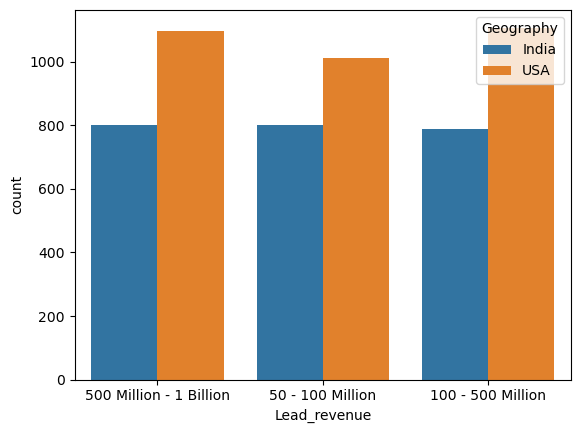

In [45]:
sns.countplot(data = train_df, x = 'Lead_revenue', hue = 'Geography')

<AxesSubplot:xlabel='Fund_category', ylabel='Success_probability'>

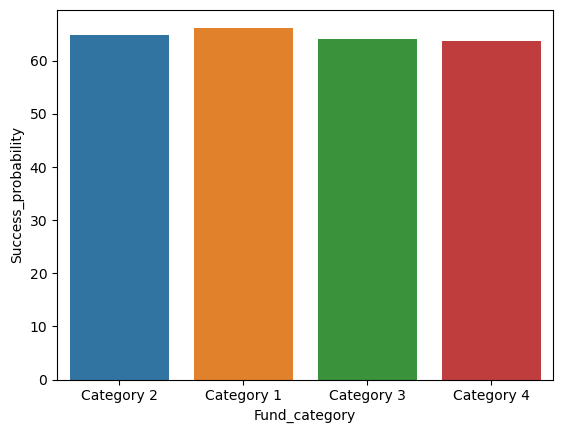

In [46]:
sns.barplot(data = train_df, x = 'Fund_category', y = 'Success_probability', ci = None)

In [47]:
train_df.head()

,Pitch,Lead_revenue,Fund_category,Geography,Lead_source,Level_of_meeting,Resource,Internal_rating,Success_probability,Deal_value(Dollars),Weighted_amount(Dollars)
0,Product_2,500 Million - 1 Billion,Category 2,India,Others,Level 1,No,1,58.6,325362.0,1756954.80
1,Product_1,500 Million - 1 Billion,Category 1,India,Others,Level 1,We have all the requirements,1,60.1,492285.0,2904481.50
2,Product_2,50 - 100 Million,Category 2,USA,Website,Level 1,We have all the requirements,2,66.0,304513.0,1735724.10
3,Product_2,500 Million - 1 Billion,Category 3,India,Website,Level 1,We have all the requirements,3,62.6,121985.0,532115.65
4,Product_2,500 Million - 1 Billion,Category 4,USA,Others,Level 3,Deliverable,4,71.2,183462.0,1256714.70


In [48]:
train_df['Pitch'].value_counts()

Product_2    2811
Product_1    2794
Name: Pitch, dtype: int64

In [49]:
train_df['Pitch'] = train_df['Pitch'].map({'Product_1' :0, 'Product_2' : 1})

In [50]:
train_df['Lead_revenue'].value_counts()

500 Million - 1 Billion    1898
100 - 500 Million          1895
50 - 100 Million           1812
Name: Lead_revenue, dtype: int64

In [51]:
train_df['Lead_revenue'] = train_df['Lead_revenue'].map({'500 Million - 1 Billion' :0, '100 - 500 Million' : 1,
                                                        '50 - 100 Million' : 2})

In [52]:
train_df['Fund_category'].value_counts()

Category 2    1446
Category 3    1438
Category 1    1388
Category 4    1333
Name: Fund_category, dtype: int64

In [53]:
train_df['Fund_category'] = train_df['Fund_category'].map({'Category 2' :0, 'Category 3' :1, 'Category 1' :2,
                                                          'Category 4' :3})

In [54]:
train_df['Geography'].value_counts()

USA      3214
India    2391
Name: Geography, dtype: int64

In [55]:
train_df['Geography'] = train_df['Geography'].map({'USA' :0, 'India' :1})

In [56]:
train_df['Lead_source'].value_counts()

Marketing Event    1477
Others             1424
Contact Email      1379
Website            1325
Name: Lead_source, dtype: int64

In [57]:
train_df['Lead_source'] = train_df['Lead_source'].map({'Marketing Event' :0, 'Others' :1, 'Contact Email' :2,
                                                      'Website' :3})

In [58]:
train_df['Level_of_meeting'].value_counts()

Level 1    1938
Level 2    1835
Level 3    1832
Name: Level_of_meeting, dtype: int64

In [59]:
train_df['Level_of_meeting'] = train_df['Level_of_meeting'].map({'Level 1' :0, 'Level 2' :1, 'Level 3' :2})

In [60]:
train_df['Resource'].value_counts()  #drop

No                              1074
We have all the requirements     932
Not enough                       910
Deliverable                      906
Cannot deliver                   902
Yes                              881
Name: Resource, dtype: int64

In [61]:
#train_df= pd.get_dummies(data = train_df, columns = ['Resource'])
train_df.drop('Resource', axis = 1, inplace = True)

In [62]:
train_df.head()

,Pitch,Lead_revenue,Fund_category,Geography,Lead_source,Level_of_meeting,Internal_rating,Success_probability,Deal_value(Dollars),Weighted_amount(Dollars)
0,1,0,0,1,1,0,1,58.6,325362.0,1756954.80
1,0,0,2,1,1,0,1,60.1,492285.0,2904481.50
2,1,2,0,0,3,0,2,66.0,304513.0,1735724.10
3,1,0,1,1,3,0,3,62.6,121985.0,532115.65
4,1,0,3,0,1,2,4,71.2,183462.0,1256714.70


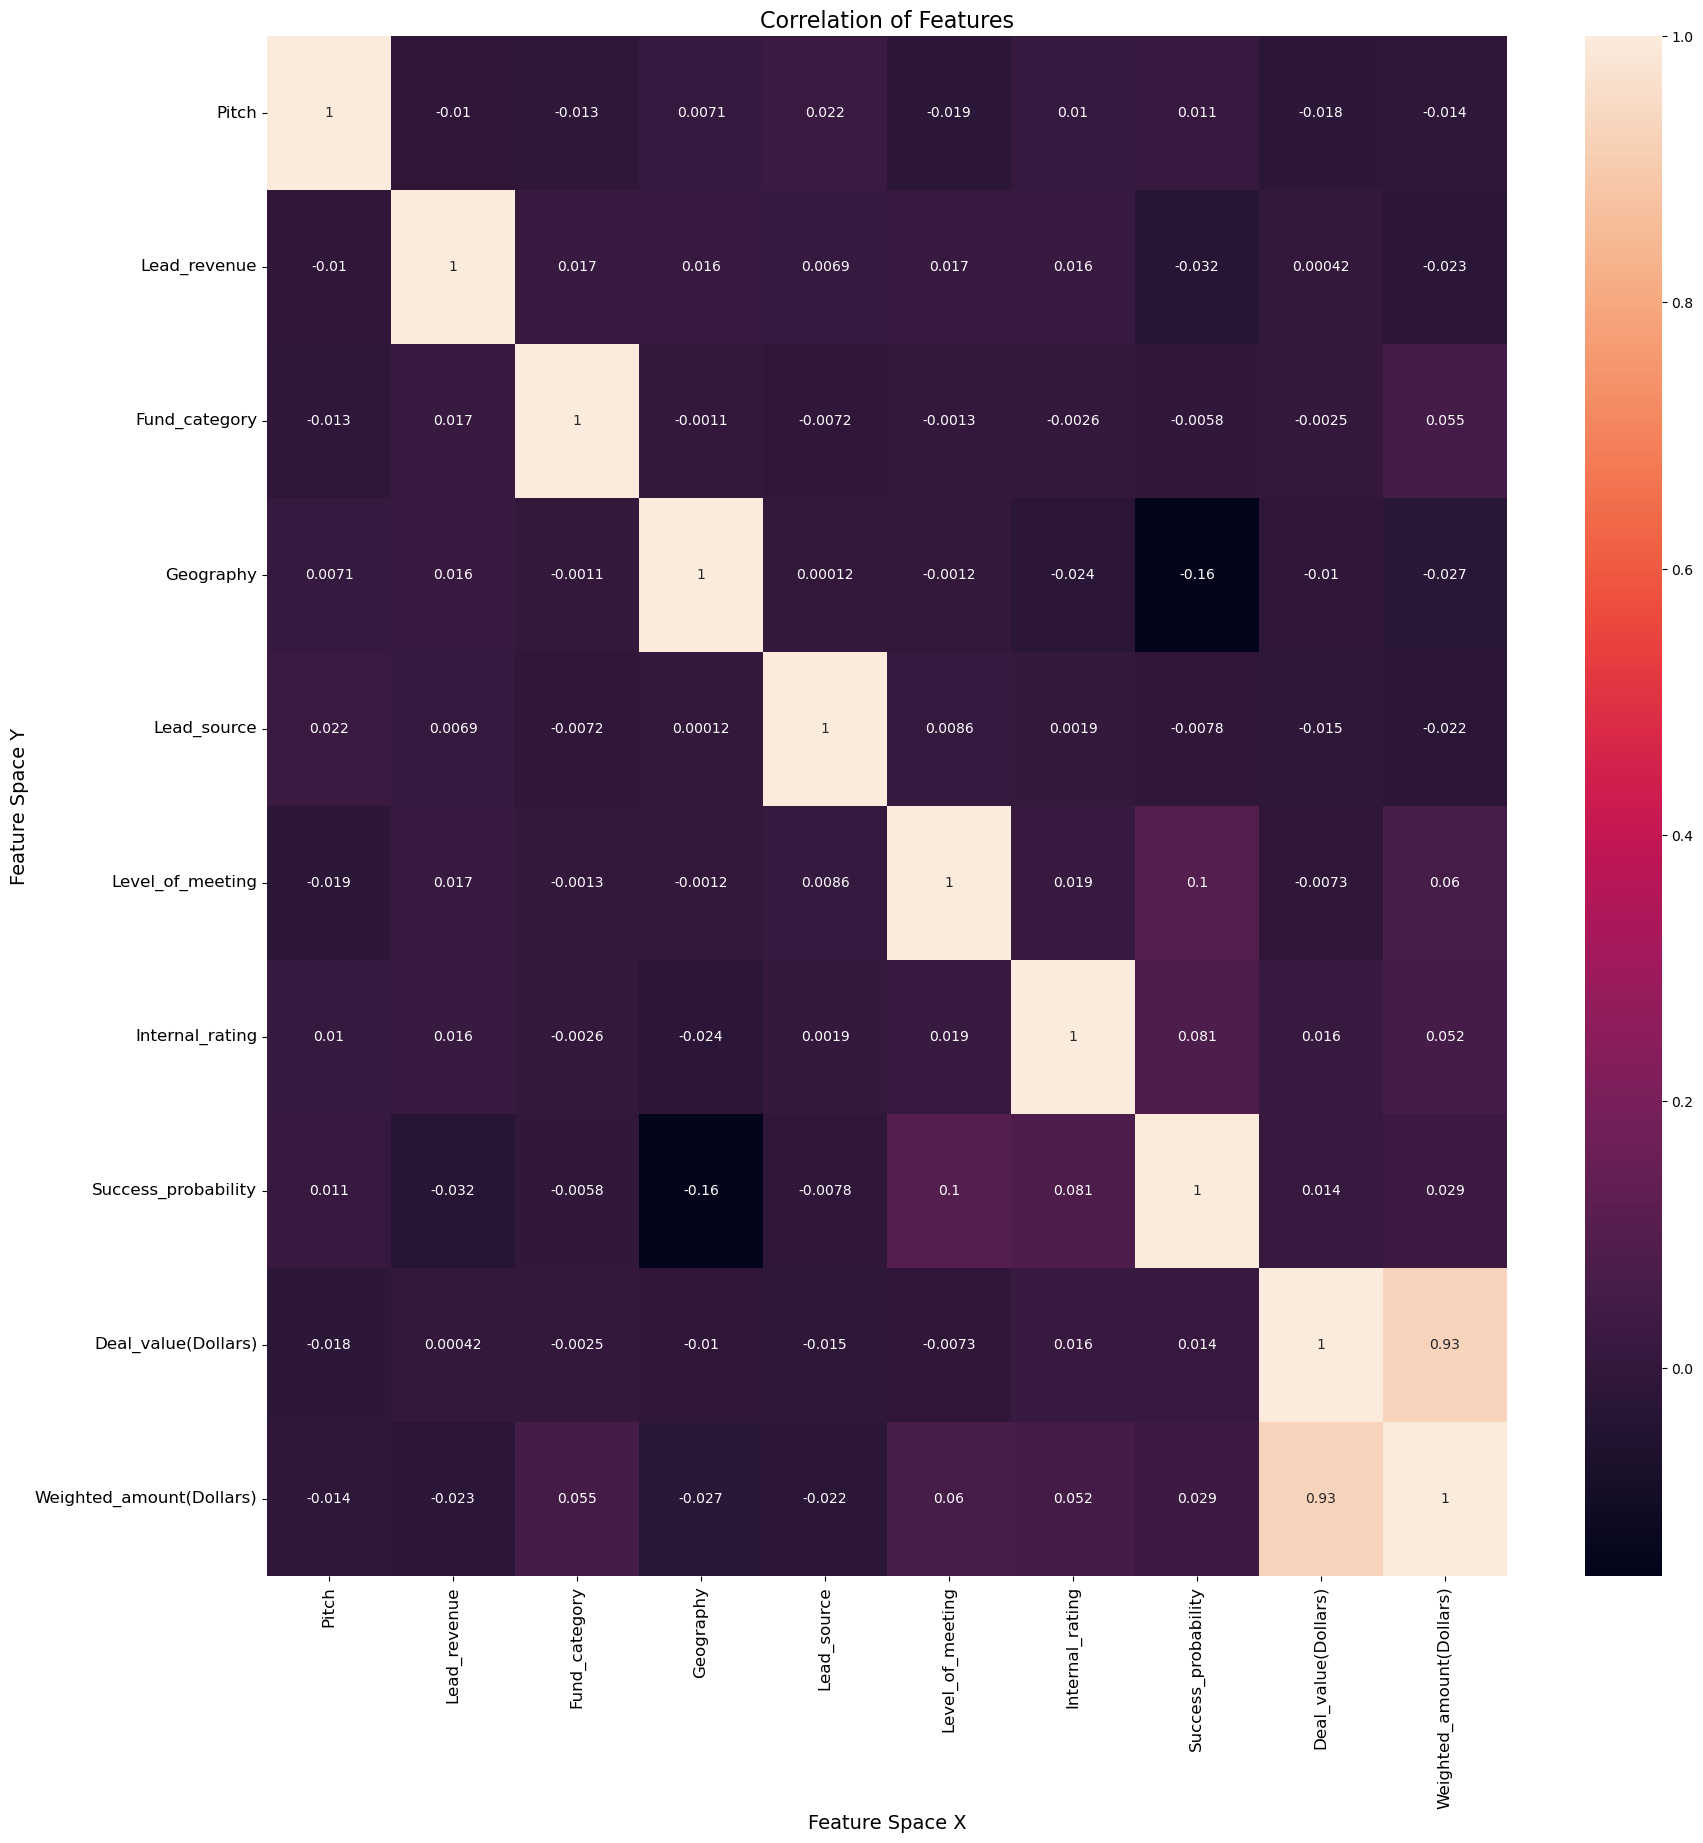

In [63]:
figure = plt.figure(figsize=[20, 20])
sns.heatmap(data=train_df.corr(), annot=True)
plt.xticks(size=12, rotation=90)
plt.yticks(size=12)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

Pitch


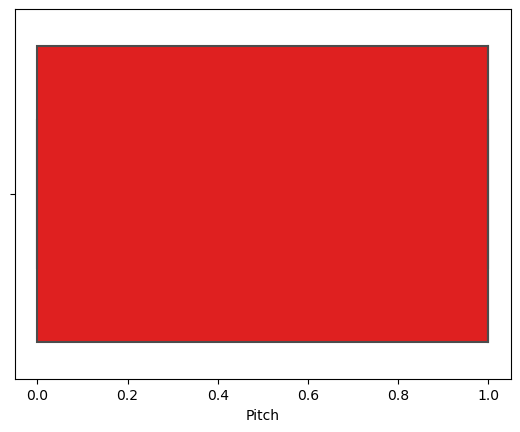

Lead_revenue


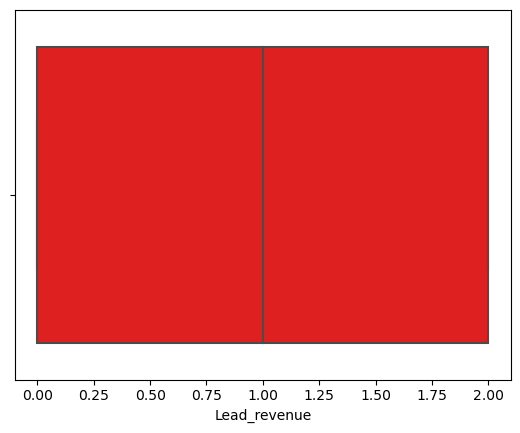

Fund_category


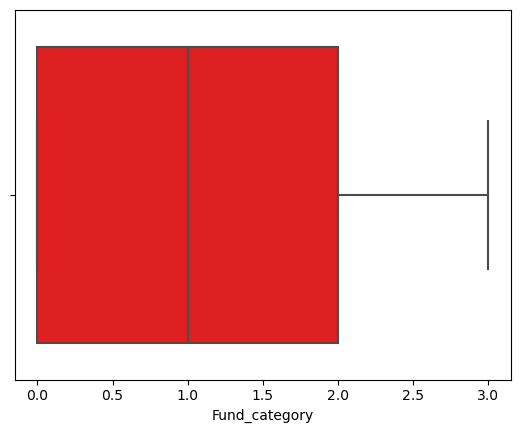

Geography


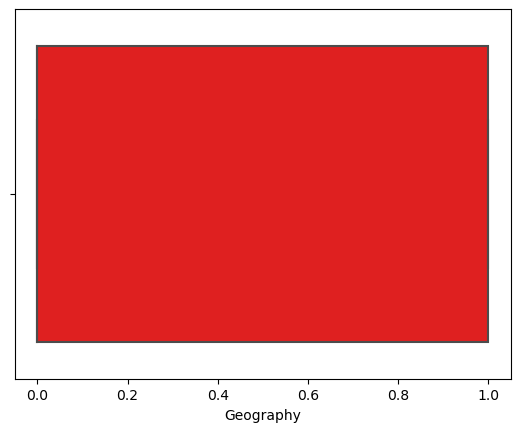

Lead_source


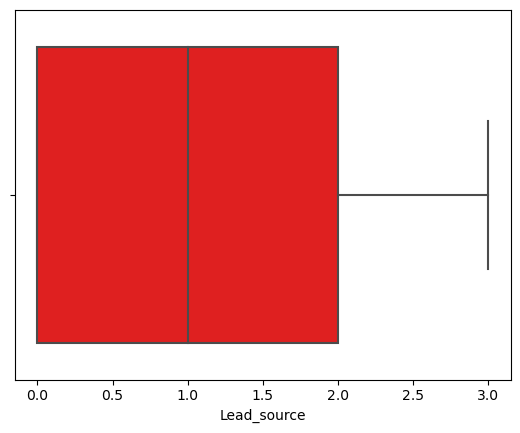

Level_of_meeting


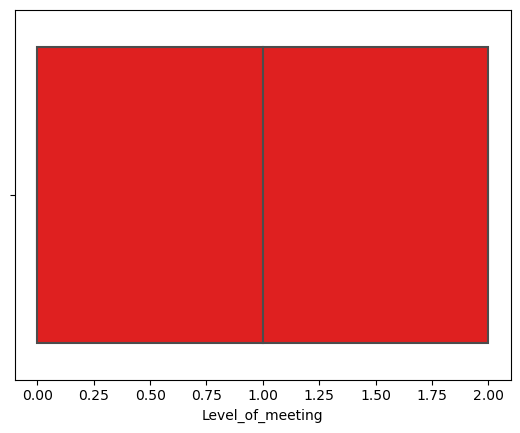

Internal_rating


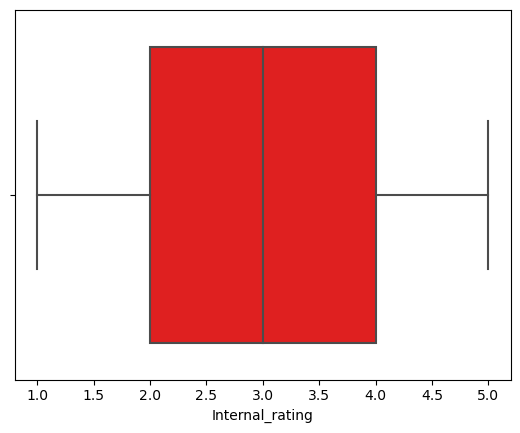

Success_probability


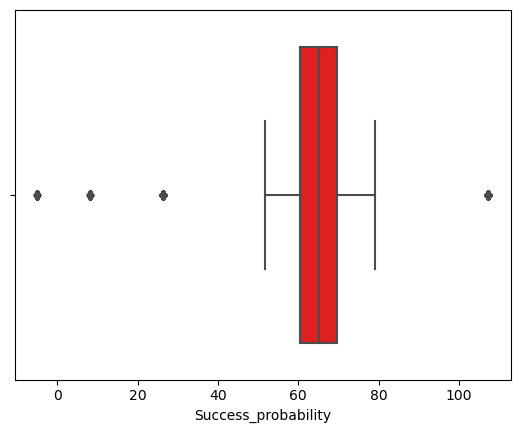

Deal_value(Dollars)


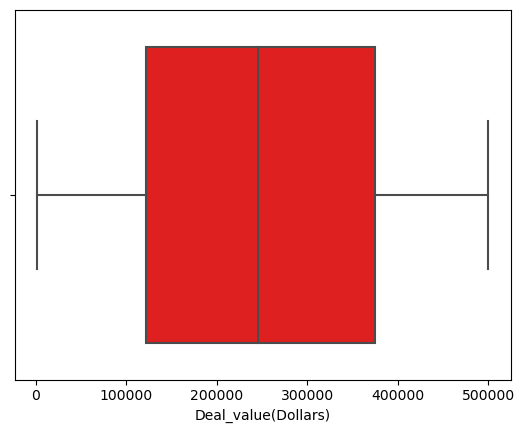

Weighted_amount(Dollars)


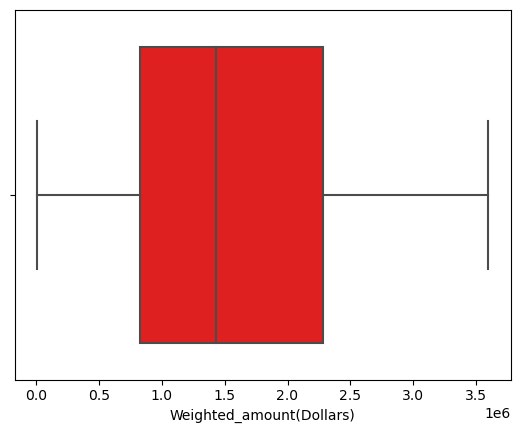

In [64]:
for col in train_df.iloc[:,:].columns:
    print(col)
    sns.boxplot(x = train_df[col], data = train_df, color = 'red')
    plt.show()

<AxesSubplot:xlabel='Success_probability', ylabel='Density'>

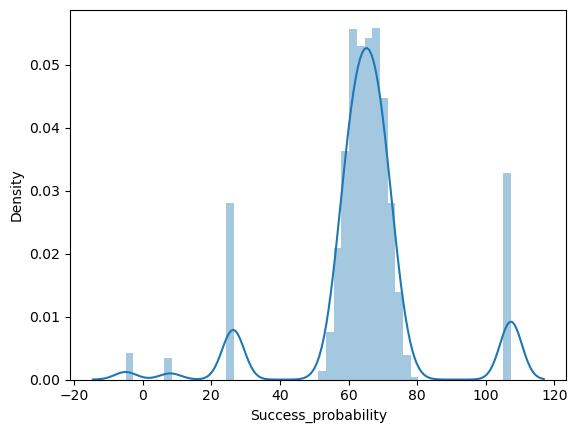

In [65]:
sns.distplot(train_df['Success_probability'])

In [66]:
#log transformation on Target column
train_df['Success_probability'] = np.log(train_df['Success_probability'])

<AxesSubplot:xlabel='Success_probability', ylabel='Density'>

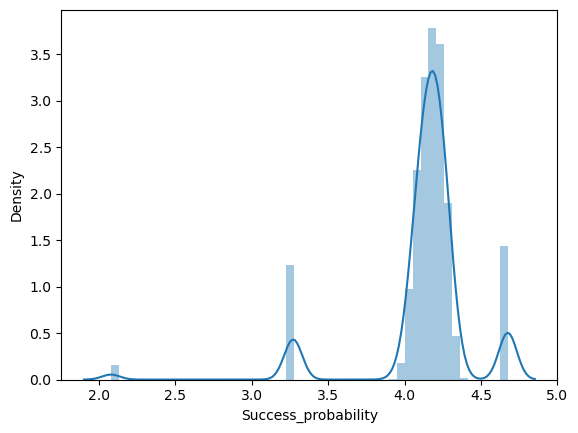

In [67]:
sns.distplot(train_df['Success_probability'])

In [68]:
train_df.head()

,Pitch,Lead_revenue,Fund_category,Geography,Lead_source,Level_of_meeting,Internal_rating,Success_probability,Deal_value(Dollars),Weighted_amount(Dollars)
0,1,0,0,1,1,0,1,4.070735,325362.0,1756954.80
1,0,0,2,1,1,0,1,4.096010,492285.0,2904481.50
2,1,2,0,0,3,0,2,4.189655,304513.0,1735724.10
3,1,0,1,1,3,0,3,4.136765,121985.0,532115.65
4,1,0,3,0,1,2,4,4.265493,183462.0,1256714.70


In [69]:
train_df = train_df.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

# Train-Test Split :

In [70]:
x = train_df.drop('Success_probability', axis = 1)
y = train_df['Success_probability']

In [71]:
x

,Pitch,Lead_revenue,Fund_category,Geography,Lead_source,Level_of_meeting,Internal_rating,Deal_value(Dollars),Weighted_amount(Dollars)
0,1,0,0,1,1,0,1,325362.0,1756954.80
1,0,0,2,1,1,0,1,492285.0,2904481.50
2,1,2,0,0,3,0,2,304513.0,1735724.10
3,1,0,1,1,3,0,3,121985.0,532115.65
4,1,0,3,0,1,2,4,183462.0,1256714.70
...,...,...,...,...,...,...,...,...,...
5600,1,1,1,0,2,2,2,271258.0,1722488.30
5601,0,2,1,1,2,0,2,255913.0,1394725.85
5602,1,2,3,1,1,0,1,119316.0,674135.40
5603,0,0,1,0,2,1,4,346955.0,2116425.50


In [72]:
y

0       4.070735
1       4.096010
2       4.189655
3       4.136765
4       4.265493
          ...   
5600    4.186620
5601    3.987130
5602    4.676001
5603    4.105944
5604    4.287716
Name: Success_probability, Length: 5605, dtype: float64

# Feature Selection :

In [73]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

selector = SelectFromModel(estimator=RandomForestRegressor(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(x, y)

selected_feat = x.columns[(selector.get_support())].tolist()

print('Total Features Selected are', len(selected_feat))

print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)

Total Features Selected are 2
Threshold set by Model: 0.11
Important Features: ['Deal_value(Dollars)', 'Weighted_amount(Dollars)']


# Feature Importance :

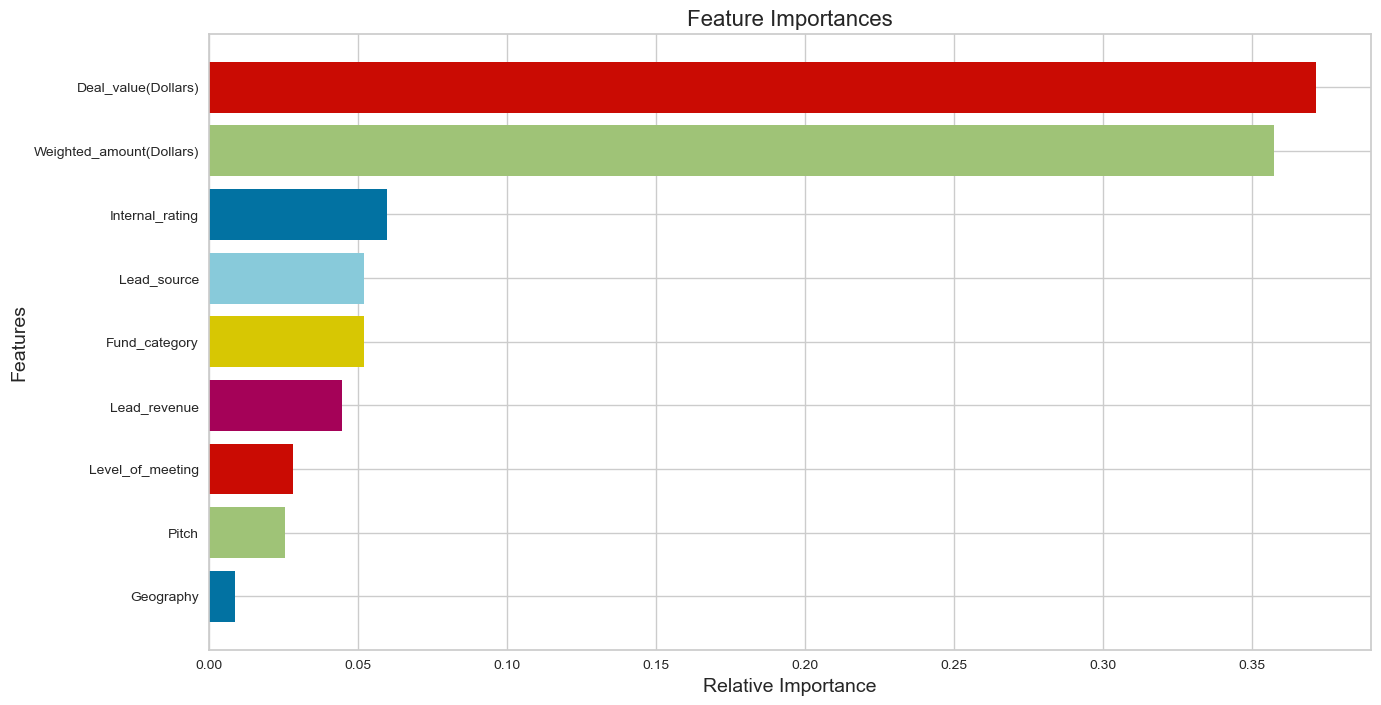

In [74]:
from yellowbrick.model_selection import FeatureImportances 

figure = plt.figure(figsize=[15, 8])
viz = FeatureImportances(selector.estimator, relative=False)
viz.fit(x, y)

plt.xlabel('Relative Importance', size=14)
plt.ylabel('Features', size=14)
plt.title(label='Feature Importances', size=16)
plt.show()

In [75]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.30, random_state = 42)

In [76]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3923, 9)
(1682, 9)
(3923,)
(1682,)


In [77]:
#using StandardScaler :
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


x_train_ = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Modelling :

# Linear Regression :

In [78]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

**Model Evaluation :**

In [79]:
y_pred_lin_train = lin_reg.predict(x_train)
y_pred_lin_test = lin_reg.predict(x_test)

In [80]:
#RMSE score on train dataset
RMSE_Linear_train = metrics.mean_squared_error(y_train, y_pred_lin_train)
RMSE_Linear_train

0.2952807203870336

In [81]:
#RMSE score on test dataset
RMSE_Linear_test = metrics.mean_squared_error(y_test, y_pred_lin_test)
RMSE_Linear_test

0.21156846986304947

# Decision Tree Regressor :

In [82]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

**Model Evaluation :**

In [83]:
y_pred_dtree_train = dtree.predict(x_train)
y_pred_dtree_test = dtree.predict(x_test)

In [84]:
#RMSE score on train dataset
RMSE_Dtree_train = metrics.mean_squared_error(y_train, y_pred_dtree_train)
RMSE_Dtree_train

0.0

In [85]:
#RMSE score on test dataset
RMSE_Dtree_test = metrics.mean_squared_error(y_test, y_pred_dtree_test)
RMSE_Dtree_test

0.6477284038625102

# AdaBoost Regressor :

In [86]:
from sklearn.ensemble import AdaBoostRegressor

ada_tree = AdaBoostRegressor(base_estimator = dtree)
ada_tree.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor())

**Model Evaluation :**

In [87]:
y_pred_ada_train = ada_tree.predict(x_train)
y_pred_ada_test = ada_tree.predict(x_test)

In [88]:
#RMSE score on train dataset
RMSE_ADAtree_train = metrics.mean_squared_error(y_train, y_pred_ada_train)
RMSE_ADAtree_train

0.0025640495171494267

In [89]:
#RMSE score on test dataset
RMSE_ADAtree_test = metrics.mean_squared_error(y_test, y_pred_ada_test)
RMSE_ADAtree_test

0.22435699907965984

# Random Forest Regressor :

In [90]:
from sklearn.ensemble import RandomForestRegressor

clf_rand = RandomForestRegressor()
clf_rand.fit(x_train, y_train)

RandomForestRegressor()

**Model Evaluation :**

In [91]:
y_pred_rf_train = clf_rand.predict(x_train)
y_pred_rf_test = clf_rand.predict(x_test)

In [92]:
#RMSE score on train dataset
RMSE_RandFr_train = metrics.mean_squared_error(y_train, y_pred_rf_train)
RMSE_RandFr_train

0.04917921496535347

In [93]:
#RMSE score on test dataset
RMSE_RandFr_test = metrics.mean_squared_error(y_test, y_pred_rf_test)
RMSE_RandFr_test

0.3040420396811117

# Bagging Regressor :

In [94]:
from sklearn.ensemble import BaggingRegressor

bag_clf = BaggingRegressor(base_estimator = clf_rand, n_estimators = 10)
bag_clf.fit(x_train, y_train)

BaggingRegressor(base_estimator=RandomForestRegressor())

**Model Evaluation :**

In [95]:
y_pred_bag_train = bag_clf.predict(x_train)
y_pred_bag_test = bag_clf.predict(x_test)

In [96]:
#RMSE score on train dataset
RMSE_BagRf_train = metrics.mean_squared_error(y_train, y_pred_bag_train)
RMSE_BagRf_train

0.11729347570601073

In [97]:
#RMSE score on test dataset
RMSE_BagRf_test = metrics.mean_squared_error(y_test, y_pred_bag_test)
RMSE_BagRf_test

0.3315379128359461

# Hyper Parameter tuning on Random Forest :

In [98]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [99]:
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [100]:
grid_rand = GridSearchCV(clf_rand, param_grid, cv = 5, verbose = 1)
grid_rand.fit(x_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]},
             verbose=1)

In [101]:
final_moodel = grid_rand.best_estimator_
final_moodel

RandomForestRegressor(max_features='sqrt', min_samples_split=8, n_estimators=30)

In [102]:
clf_rand = RandomForestRegressor(max_features='sqrt', min_samples_split=8, n_estimators=30)
clf_rand.fit(x_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_split=8, n_estimators=30)

**Model Evaluation :**

In [103]:
y_pred_RandF_train = clf_rand.predict(x_train)
y_pred_RandF_test = clf_rand.predict(x_test)

In [104]:
#RMSE score on train dataset
RMSE_GridRf_train = metrics.mean_squared_error(y_train, y_pred_RandF_train)
RMSE_GridRf_train

0.15067533318116968

In [105]:
#RMSE score on test dataset
RMSE_GridRf_test = metrics.mean_squared_error(y_test, y_pred_RandF_test)
RMSE_GridRf_test

0.3218990386511152

# Gradient Boosting Regressor :

In [106]:
from sklearn.ensemble import GradientBoostingRegressor
grad_reg = GradientBoostingRegressor(learning_rate= 0.05)

In [107]:
grad_reg.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05)

**Model Evaluation :**

In [108]:
y_pred_Grad_train = clf_rand.predict(x_train)
y_pred_Grad_test = clf_rand.predict(x_test)

In [109]:
#RMSE score on train dataset
RMSE_Grad_train = metrics.mean_squared_error(y_train, y_pred_Grad_train)
RMSE_Grad_train

0.15067533318116968

In [110]:
#RMSE score on test dataset
RMSE_Grad_test = metrics.mean_squared_error(y_test, y_pred_Grad_test)
RMSE_Grad_test

0.3218990386511152

# Xgb Regressor :

In [111]:
from xgboost import XGBRegressor

XGB_reg = XGBRegressor(learning_rate = 0.05)
XGB_reg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

**Model Evaluation :**

In [112]:
y_pred_xg_train = XGB_reg.predict(x_train)
y_pred_xg_test = XGB_reg.predict(x_test)

In [113]:
#RMSE score on train dataset
RMSE_Xgb_train = metrics.mean_squared_error(y_train, y_pred_xg_train)
RMSE_Xgb_train

0.22570537224022416

In [114]:
#RMSE score on test dataset
RMSE_Xgb_test = metrics.mean_squared_error(y_test, y_pred_xg_test)
RMSE_Xgb_test

0.30838461310147086

In [123]:
models = pd.DataFrame({ 'Model': ['Linear Regressor', 'Decision Tree Regressor', 'ADABoost Regressor','Random Forest Regressor', 'Bagging Regressor', 'GridSearch(RandF)', 'GradientBoosting Regressor', 'XGBoost Regressor'],
                       'Training RMSE': [RMSE_Linear_train, RMSE_Dtree_train, RMSE_ADAtree_train,
                                         RMSE_RandFr_train, RMSE_BagRf_train, RMSE_GridRf_train, RMSE_Grad_train,
                                            RMSE_Xgb_train],
                       
                       'Testing RMSE': [RMSE_Linear_test, RMSE_Dtree_test, RMSE_ADAtree_test, RMSE_RandFr_test, RMSE_BagRf_test, RMSE_GridRf_test,
                                        RMSE_Grad_test, RMSE_Xgb_test]})
models.sort_values(by = ['Training RMSE', 'Testing RMSE'], ascending = False, ignore_index = True)

,Model,Training RMSE,Testing RMSE
0,Linear Regressor,0.295281,0.211568
1,XGBoost Regressor,0.225705,0.308385
2,GridSearch(RandF),0.150675,0.321899
3,GradientBoosting Regressor,0.150675,0.321899
4,Bagging Regressor,0.117293,0.331538
5,Random Forest Regressor,0.049179,0.304042
6,ADABoost Regressor,0.002564,0.224357
7,Decision Tree Regressor,0.000000,0.647728


# Kfold Cross Validation :

In [127]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [125]:
Regressors = []

Regressors.append(LinearRegression())
Regressors.append(DecisionTreeRegressor())
Regressors.append(AdaBoostRegressor())
Regressors.append(RandomForestRegressor())
Regressors.append(BaggingRegressor(n_estimators = 10))
Regressors.append(RandomForestRegressor(max_features='sqrt', min_samples_split=8, n_estimators=30))
Regressors.append(GradientBoostingRegressor())
Regressors.append(XGBRegressor())


In [128]:
cv_results = []

for Regressor in Regressors:
    cv_results.append(cross_val_score(Regressor, x_train, y_train, scoring = 'neg_root_mean_squared_error', cv = 5))

In [129]:
cv_results

[array([-0.54153182, -0.58352314, -0.57474721, -0.53187727, -0.48907952]),
 array([-0.75282396, -0.80453184, -0.81021933, -0.87749318, -0.81562418]),
 array([-0.69562005, -0.71889341, -0.59598651, -0.68294974, -0.84896919]),
 array([-0.56849766, -0.61356343, -0.60471267, -0.56174658, -0.52661976]),
 array([-0.59476753, -0.63796049, -0.61990424, -0.60458876, -0.56421967]),
 array([-0.55728586, -0.59986298, -0.58824918, -0.54985284, -0.51197597]),
 array([-0.5473542 , -0.5999128 , -0.59362946, -0.55033756, -0.51453712]),
 array([-0.6034581 , -0.64388058, -0.64474558, -0.5831664 , -0.56779611])]

In [130]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [131]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm':['Linear Regressor', 'Decision Tree Regressor', 'ADABoost Regressor','Random Forest Regressor', 'Bagging Regressor', 'GridSearch(RandF)', 'GradientBoosting Regressor', 'XGBoost Regressor']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending  = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,-0.544152,0.033695,Linear Regressor
1,-0.561154,0.031741,GradientBoosting Regressor
2,-0.561445,0.030962,GridSearch(RandF)
3,-0.575028,0.031396,Random Forest Regressor
4,-0.604288,0.024795,Bagging Regressor
5,-0.608609,0.031271,XGBoost Regressor
6,-0.708484,0.081630,ADABoost Regressor
7,-0.812138,0.039656,Decision Tree Regressor


# Lasso and Ridge Regressor :

In [136]:
from sklearn import linear_model

In [178]:
lasso_reg = linear_model.Lasso(alpha = 50, max_iter = 100, tol = 0.1)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

**Model Evaluation :**

In [179]:
y_pred_lasso_train = lasso_reg.predict(x_train)
y_pred_lasso_test = lasso_reg.predict(x_test)

In [180]:
#RMSE score on train dataset
RMSE_lasso_train = metrics.mean_squared_error(y_train, y_pred_lasso_train)
RMSE_lasso_train

0.29800079259197954

In [181]:
#RMSE score on test dataset
RMSE_lasso_test = metrics.mean_squared_error(y_test, y_pred_lasso_test)
RMSE_lasso_test

0.21098904804033

In [182]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 50, max_iter = 100, tol = 0.1)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

**Model Evaluation :**

In [183]:
y_pred_ridge_train = ridge_reg.predict(x_train)
y_pred_ridge_test = ridge_reg.predict(x_test)

In [184]:
#RMSE score on train dataset
RMSE_ridge_train = metrics.mean_squared_error(y_train, y_pred_ridge_train)
RMSE_ridge_train

0.29528517772418544

In [185]:
#RMSE score on test dataset
RMSE_ridge_test = metrics.mean_squared_error(y_test, y_pred_ridge_test)
RMSE_ridge_test

0.21136611919853715

In [186]:
models = pd.DataFrame({ 'Model': ['Linear Regressor', 'Decision Tree Regressor', 'ADABoost Regressor','Random Forest Regressor', 'Bagging Regressor', 'GridSearch(RandF)', 'GradientBoosting Regressor', 'XGBoost Regressor', 'Lasso', 'Ridge'],
                       'Training RMSE': [RMSE_Linear_train, RMSE_Dtree_train, RMSE_ADAtree_train,
                                         RMSE_RandFr_train, RMSE_BagRf_train, RMSE_GridRf_train, RMSE_Grad_train,
                                            RMSE_Xgb_train, RMSE_lasso_train, RMSE_ridge_train],
                       
                       'Testing RMSE': [RMSE_Linear_test, RMSE_Dtree_test, RMSE_ADAtree_test, RMSE_RandFr_test, RMSE_BagRf_test, RMSE_GridRf_test,
                                        RMSE_Grad_test, RMSE_Xgb_test, RMSE_lasso_test,RMSE_ridge_test]})
models.sort_values(by = ['Training RMSE', 'Testing RMSE'], ascending = False, ignore_index = True)

,Model,Training RMSE,Testing RMSE
0,Lasso,0.298001,0.210989
1,Ridge,0.295285,0.211366
2,Linear Regressor,0.295281,0.211568
3,XGBoost Regressor,0.225705,0.308385
4,GridSearch(RandF),0.150675,0.321899
5,GradientBoosting Regressor,0.150675,0.321899
6,Bagging Regressor,0.117293,0.331538
7,Random Forest Regressor,0.049179,0.304042
8,ADABoost Regressor,0.002564,0.224357
9,Decision Tree Regressor,0.000000,0.647728


In [225]:
test_df = pd.read_csv('test_data.csv')

In [226]:
test_df.head()

,Deal_title,Lead_name,Industry,Deal_value,Weighted_amount,Date_of_creation,Pitch,Contact_no,Lead_revenue,Fund_category,...,POC_name,Designation,Lead_POC_email,Hiring_candidate_role,Lead_source,Level_of_meeting,Last_lead_update,Internal_POC,Resource,Internal_rating
0,TitleLFW99,Mcgrath PLC PLC,Banks,148175$,963137.5$,2019-11-11,Product_1,(255)484-8544x98190,500 Million - 1 Billion,Category 4,...,rashmi @ rinku,Chief Executive Officer,michaelortega@mcgrath.com,Exhibition designer,Contact Email,Level 2,More than 2 weeks,"Houston,Arnold E",Deliverable,3
1,Title7WR77,Shepard Inc LLC,Automotive/Transportation,273302$,1803793.2$,2019-06-15,Product_1,001-537-692-7359x0941,50 - 100 Million,Category 1,...,jyoti,Chairman/Chief Innovation Officer,bradleypatton@shepard.com,"Designer, furniture",Marketing Event,Level 3,Did not hear back after Level 1,"Mabrey,Kevin C",Cannot deliver,1
2,TitleF6Q9B,"Gomez, Keith and Simpson Ltd",Insurance,185344$,1260339.2$,2020-03-24,Product_2,001-832-090-1215,50 - 100 Million,Category 1,...,anita,CEO/Co-Founder/Chairman,meredithjones@gomez.com,Fisheries officer,Marketing Event,Level 3,?,"Dunaway,Antoine",Cannot deliver,3
3,Title8TVFW,"Mendoza, Hess and Martin Ltd",Financial Services,189599$,1194473.7$,2020-02-01,Product_1,(887)737-2139,500 Million - 1 Billion,Category 1,...,Terri Freeman,Vice President / GM (04-present) : VP Sales an...,terrifreeman@mendoza.com,Travel agency manager,Others,Level 1,NaN,"Shelton,Sidney P",Not enough,3
4,TitleH8JO8,"Cunningham, Daniels and Brady LLC",Software,379241$,2427142.4$,2020-10-20,Product_1,+1-424-763-3037x699,50 - 100 Million,Category 1,...,maya,Executive Vice President,kevinwalton@cunningham.com,Arts development officer,Contact Email,Level 3,Following up but lead not responding,"Young,Valerie K",Yes,1


In [227]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Deal_title             1402 non-null   object
 1   Lead_name              1402 non-null   object
 2   Industry               1402 non-null   object
 3   Deal_value             1391 non-null   object
 4   Weighted_amount        1300 non-null   object
 5   Date_of_creation       1402 non-null   object
 6   Pitch                  1402 non-null   object
 7   Contact_no             1402 non-null   object
 8   Lead_revenue           1402 non-null   object
 9   Fund_category          1402 non-null   object
 10  Geography              1220 non-null   object
 11  Location               1400 non-null   object
 12  POC_name               1400 non-null   object
 13  Designation            1402 non-null   object
 14  Lead_POC_email         1402 non-null   object
 15  Hiring_candidate_role

In [228]:
test_df.isna().sum()

Deal_title                 0
Lead_name                  0
Industry                   0
Deal_value                11
Weighted_amount          102
Date_of_creation           0
Pitch                      0
Contact_no                 0
Lead_revenue               0
Fund_category              0
Geography                182
Location                   2
POC_name                   2
Designation                0
Lead_POC_email             0
Hiring_candidate_role      0
Lead_source                0
Level_of_meeting           0
Last_lead_update         135
Internal_POC               0
Resource                  38
Internal_rating            0
dtype: int64

In [229]:
test_df[test_df.columns[3:5]] = test_df[test_df.columns[3:5]].replace('[\$,]', '', regex=True).astype(float)

In [230]:
test_df['Deal_value(Dollars)'] = test_df['Deal_value'].rename({'Deal_value' :'Deal_value(Dollars)'})
test_df['Weighted_amount(Dollars)'] = test_df['Weighted_amount'].rename({'Weighted_amount' :'Weighted_amount(Dollars)'})

In [231]:
test_df.drop(['Deal_value', 'Weighted_amount'], axis = 1, inplace = True)

In [232]:
test_df.drop(['Lead_name', 'Industry', 'Date_of_creation', 'Contact_no', 'Location', 'Designation',
              'Lead_POC_email', 'Hiring_candidate_role', 'Last_lead_update', 'Internal_POC'], axis = 1, inplace = True)

In [233]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Deal_title                1402 non-null   object 
 1   Pitch                     1402 non-null   object 
 2   Lead_revenue              1402 non-null   object 
 3   Fund_category             1402 non-null   object 
 4   Geography                 1220 non-null   object 
 5   POC_name                  1400 non-null   object 
 6   Lead_source               1402 non-null   object 
 7   Level_of_meeting          1402 non-null   object 
 8   Resource                  1364 non-null   object 
 9   Internal_rating           1402 non-null   int64  
 10  Deal_value(Dollars)       1391 non-null   float64
 11  Weighted_amount(Dollars)  1300 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 131.6+ KB


In [234]:
test_df.isna().sum()

Deal_title                    0
Pitch                         0
Lead_revenue                  0
Fund_category                 0
Geography                   182
POC_name                      2
Lead_source                   0
Level_of_meeting              0
Resource                     38
Internal_rating               0
Deal_value(Dollars)          11
Weighted_amount(Dollars)    102
dtype: int64

In [235]:
test_df['Geography'] = test_df['Geography'].fillna(test_df['Geography'].mode()[0])

In [236]:
test_df['Weighted_amount(Dollars)'].fillna(test_df['Weighted_amount(Dollars)'].median(), inplace = True)
test_df['Deal_value(Dollars)'].fillna(test_df['Deal_value(Dollars)'].median(), inplace = True)

In [237]:
test_df.drop(['POC_name', 'Resource'], axis = 1, inplace = True)

In [238]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Deal_title                1402 non-null   object 
 1   Pitch                     1402 non-null   object 
 2   Lead_revenue              1402 non-null   object 
 3   Fund_category             1402 non-null   object 
 4   Geography                 1402 non-null   object 
 5   Lead_source               1402 non-null   object 
 6   Level_of_meeting          1402 non-null   object 
 7   Internal_rating           1402 non-null   int64  
 8   Deal_value(Dollars)       1402 non-null   float64
 9   Weighted_amount(Dollars)  1402 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 109.7+ KB


In [239]:
test_df['Pitch'] = test_df['Pitch'].map({'Product_1' :0, 'Product_2' : 1})
test_df['Lead_revenue'] = test_df['Lead_revenue'].map({'500 Million - 1 Billion' :0, '100 - 500 Million' : 1,
                                                        '50 - 100 Million' : 2})
test_df['Fund_category'] = test_df['Fund_category'].map({'Category 2' :0, 'Category 3' :1, 'Category 1' :2,
                                                          'Category 4' :3})
test_df['Geography'] = test_df['Geography'].map({'USA' :0, 'India' :1})
test_df['Lead_source'] = test_df['Lead_source'].map({'Marketing Event' :0, 'Others' :1, 'Contact Email' :2,
                                                      'Website' :3})
test_df['Level_of_meeting'] = test_df['Level_of_meeting'].map({'Level 1' :0, 'Level 2' :1, 'Level 3' :2})

In [240]:
test_df.head()

,Deal_title,Pitch,Lead_revenue,Fund_category,Geography,Lead_source,Level_of_meeting,Internal_rating,Deal_value(Dollars),Weighted_amount(Dollars)
0,TitleLFW99,0,0,3,1,2,1,3,148175.0,963137.5
1,Title7WR77,0,2,2,1,0,2,1,273302.0,1803793.2
2,TitleF6Q9B,1,2,2,1,0,2,3,185344.0,1260339.2
3,Title8TVFW,0,0,2,0,1,0,3,189599.0,1194473.7
4,TitleH8JO8,0,2,2,1,2,2,1,379241.0,2427142.4


In [241]:
df_test = test_df.iloc[:, 1:]

In [242]:
df_test.head()

,Pitch,Lead_revenue,Fund_category,Geography,Lead_source,Level_of_meeting,Internal_rating,Deal_value(Dollars),Weighted_amount(Dollars)
0,0,0,3,1,2,1,3,148175.0,963137.5
1,0,2,2,1,0,2,1,273302.0,1803793.2
2,1,2,2,1,0,2,3,185344.0,1260339.2
3,0,0,2,0,1,0,3,189599.0,1194473.7
4,0,2,2,1,2,2,1,379241.0,2427142.4


In [243]:
df_test = scaler.transform(df_test)

In [244]:
predict = lasso_reg.predict(df_test)

In [245]:
predict

array([4.07421068, 4.07421054, 4.07421064, ..., 4.07421066, 4.07421063,
       4.07421046])

In [246]:
test_df['Success_probability'] = predict

In [247]:
test_df.head()

,Deal_title,Pitch,Lead_revenue,Fund_category,Geography,Lead_source,Level_of_meeting,Internal_rating,Deal_value(Dollars),Weighted_amount(Dollars),Success_probability
0,TitleLFW99,0,0,3,1,2,1,3,148175.0,963137.5,4.074211
1,Title7WR77,0,2,2,1,0,2,1,273302.0,1803793.2,4.074211
2,TitleF6Q9B,1,2,2,1,0,2,3,185344.0,1260339.2,4.074211
3,Title8TVFW,0,0,2,0,1,0,3,189599.0,1194473.7,4.074211
4,TitleH8JO8,0,2,2,1,2,2,1,379241.0,2427142.4,4.074210


In [248]:
test_df.to_csv('submission_market.csv', index = False, header = False)